<a href="https://colab.research.google.com/github/miraclechukwu/Customer-Segmentation-Using-K-Means-Clusters/blob/main/Customer_segmentation_using_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Data collection and Analysis

In [4]:
# load the data from a csv file to a pandas dataframe
Customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
# first 5 rows in the dataframe
Customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:

# finding the number of rows and columns in the dataset
Customer_data.shape

(200, 5)

In [7]:
# getting some information about the dataset
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking for missing values
Customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Univaraite Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

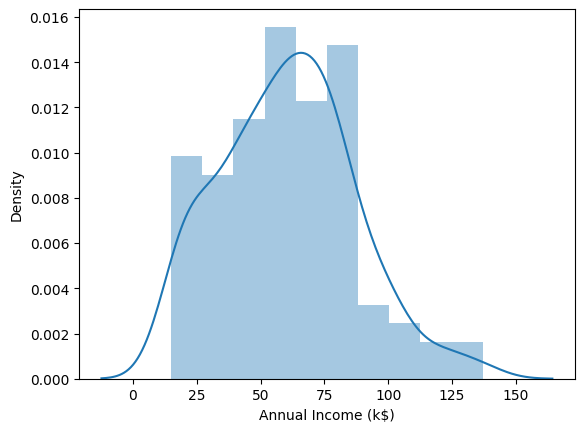

In [9]:
sns.distplot(Customer_data['Annual Income (k$)'])

In [10]:
Customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

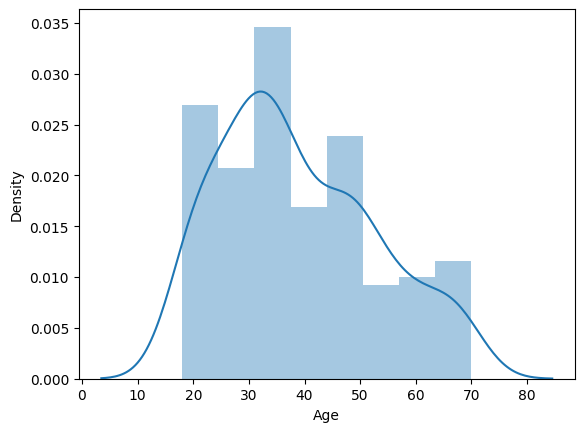

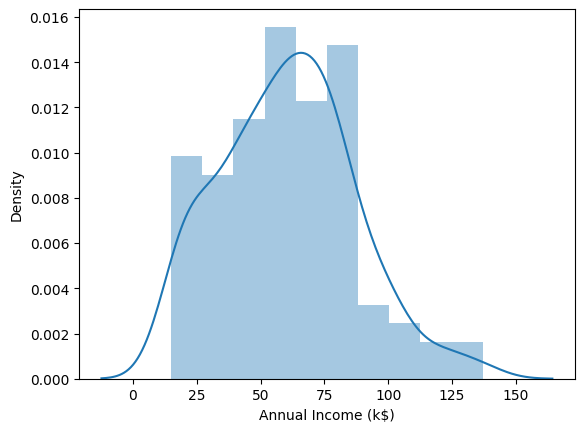

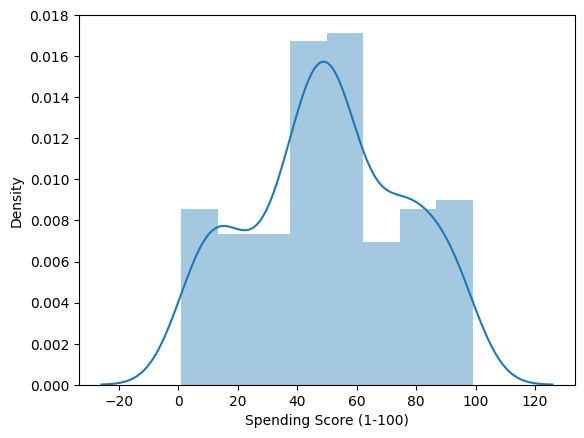

In [12]:
for i in columns:
  plt.figure()
  sns.distplot(Customer_data[i])

Selecting the annual income column and spending score column as criteria for customer segmentation

In [13]:
X = Customer_data.iloc[ : ,[3,4]].values

In [ ]:
print(X)

Choosing the number of clusters

WCSS ---> Within Clusters Sum Of Squares

In [21]:
# Finding WCSS value of the dataset to get the number of clusters

Wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)

  Wcss.append(kmeans.inertia_)

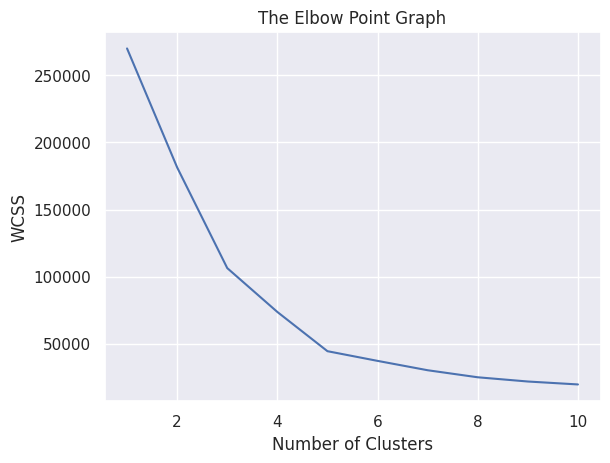

In [16]:
# plotting the elbow point graph
sns.set()
plt.plot(range(1,11),Wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the Elbow point graph the optimum number of clusters = 5

Training the K means clustering model

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

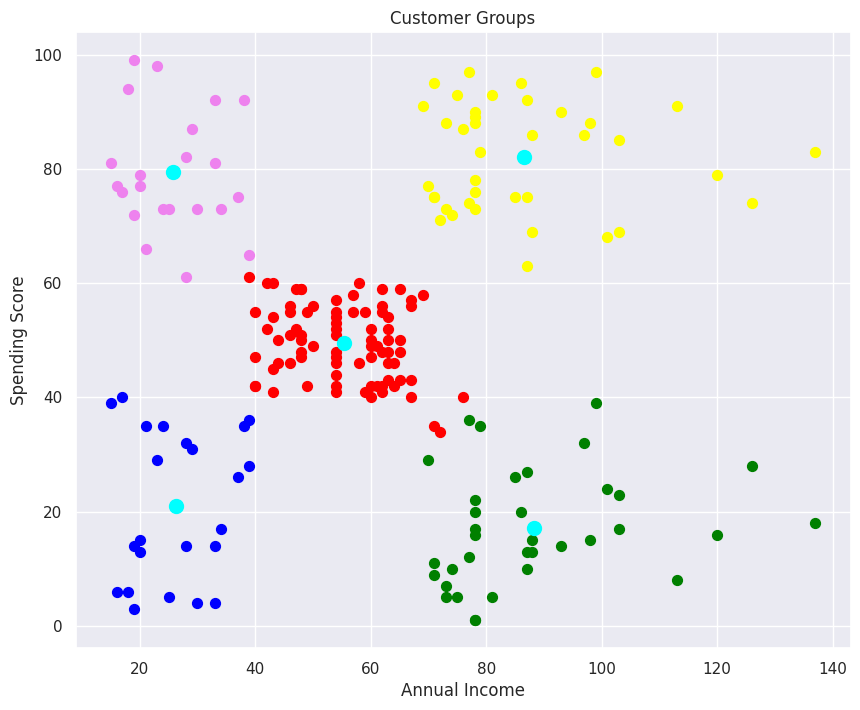

In [18]:
# plotting all the clusters ad their centroid
plt.figure(figsize=(10,8))

plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Recommendations for the Customer Mall:**

1. **Tailor Services for Each Customer Category:**
   Customize services and experiences to meet the needs of each customer category. For example, offer budget-friendly promotions and discounts for customers with low annual income and low spending scores to encourage their patronage. Conversely, provide premium services and exclusive benefits for high-spending customers with high annual incomes to enhance their shopping experience and foster loyalty.

2. **Optimize Tenant Mix Based on Customer Segmentation:**
   Adjust the mall's tenant mix and merchandise offerings to cater to the preferences of each customer category. For instance, stock affordable yet trendy products for customers with low annual incomes but high spending scores, while also offering luxury brands and upscale amenities for high-income shoppers with discerning tastes. By aligning the mall's offerings with the preferences of each customer category, you can maximize sales and satisfaction across the board.

3. **Develop Targeted Marketing Campaigns:**
   Create targeted marketing campaigns tailored to the unique characteristics and behaviors of each customer category. Utilize personalized messaging and promotions to appeal to the specific needs and preferences of low-income, budget-conscious shoppers, as well as high-income, luxury-seeking clientele. By delivering relevant and compelling marketing messages to each customer category, you can increase engagement and drive conversion rates effectively.

4. **Enhance Loyalty Programs for High-Value Segments:**
   Enhance loyalty programs to reward and incentivize high-value customer segments, such as those with high annual incomes and high spending scores. Offer exclusive perks, VIP events, and personalized rewards to encourage repeat visits and purchases from these valuable customers. By nurturing loyalty among high-value segments, you can increase customer retention and lifetime value, driving sustained revenue growth.

5. **Stay Agile and Responsive to Changing Preferences:**
   Continuously monitor and adapt to changing customer preferences and market trends across all customer categories. Regularly analyze sales data, customer feedback, and demographic insights to identify emerging opportunities and areas for improvement. Use this information to refine strategies, adjust offerings, and innovate services to meet the evolving needs of each customer category effectively. By staying agile and responsive, you can maintain relevance and competitiveness in the dynamic retail landscape.